{0: 0, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 3, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 3, 96: 1, 97: 1, 98: 1, 99: 1}
The program took 0.0003871917724609375 seconds to complete
The program took 0.0006020069122314453 seconds to complete
3.1096059113300494
[56, 3] {0: inf, 1: inf, 2: inf, 3: 0, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: 0, 13: inf, 14: inf, 15: inf, 16: inf, 17: inf, 18: inf, 19: in

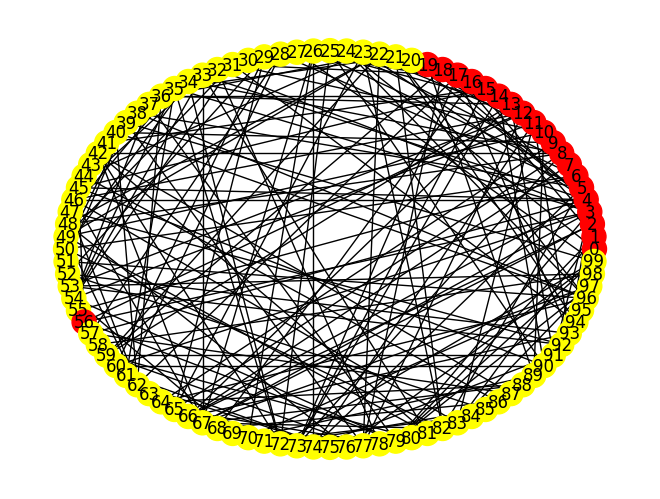

In [ ]:
import networkx as nx
import random
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_random_weighted_graph(n_nodes, n_edges, p):
    G = nx.Graph()
    secret_num = math.floor(n_nodes*p)
    for i in range(secret_num):
        G.add_node(i, label=1)
    for i in range(secret_num, n_nodes):
        G.add_node(i, label=0)
    #initialization of the secret nodes
    for _ in range(n_edges):
        u, v = random.sample(list(G.nodes), k=2)
        if G.nodes[u]['label']!=G.nodes[v]['label']:
          G.add_edge(u, v, weight=1)
        else:
          G.add_edge(u, v, weight=0)
    #initialization of the weight
    #Todo: potential problem is duplicately adding edges
    return G

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph.nodes}
    distances[start] = 0
    queue = [(0, start)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    return distances

def fulldijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        # Early stopping condition
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            return path[::-1], distances

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None


def original(graph, start):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None
#graph initial
p = 0.2 #percent of secret node
nodenum = 40
edgenum = 200
graph = generate_random_weighted_graph(nodenum, edgenum, p)
secretnum = math.floor(nodenum*p)
#random graph connectivity check
testans = dijkstra(graph, 0)
print(testans)
for item in testans.keys():
    if(testans[item] == float('infinity')):
      print("graph connectivity error")
      exit()
#flow initial
# a potential determining param is the original secret flow numbers
flows=[] #original secret flow
paths=[]
for _ in range(4):
    u, v = random.sample(range(secretnum), k=2)
    #Todo: potential add depulicate flows
    flows.append([u,v])
    path, distances = fulldijkstra(graph,u,v)
    paths.append(path)
    if(distances[u] != 0):
       print("relabeling")
       #need to relabel
       for step in path:
           if(graph.nodes[step]['label']!=0):
               graph.nodes[step]['label'] = 1
               for neighbor in graph[step]:
                   if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                       graph[step][neighbor]['weight'] = 1
                   else:
                       graph[step][neighbor]['weight'] = 0
#add original secret flows and update the graph

m = random.choice(range(secretnum, nodenum)) #pick a random public node as the moving mobile node

previous = random.choice(range(secretnum))

graph.nodes[m]['label'] = 1
for neighbor in graph[m]:
    graph[m][neighbor]['weight'] = 1 - graph.nodes[neighbor]['label']
#find an incremental path
start1 = time.time()
path, distances = fulldijkstra(graph, m, previous)
end1 = time.time()
elapsed1 = end1 - start1
print(f'The program took {elapsed1} seconds to complete')
start2 = time.time()
res1, res2 = original(graph, m)
end2 = time.time()
elapsed2 = end2 - start2
print(f'The program took {elapsed2} seconds to complete')
print(2*elapsed2/elapsed1)
print(path, distances)

for step in path:
    print(step)
    if(graph.nodes[step]['label']!=0):
        graph.nodes[step]['label'] = 1
        for neighbor in graph[step]:
            if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                graph[step][neighbor]['weight'] = 1
            else:
                graph[step][neighbor]['weight'] = 0

drawcolordict=[]
for item in range(nodenum):
    if(graph.nodes[item]['label']==1):
        drawcolordict.append('red')
    else:
        drawcolordict.append('yellow')

nx.draw_circular(graph, with_labels=True, node_color=drawcolordict)
plt.show()


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[1.3214111328125, 0.5756616592407227, 0.559234619140625, 0.7703065872192383, 0.5044460296630859, 0.5454540252685547, 0.5760669708251953, 0.5898237228393555, 0.6680727005004883, 0.6811857223510742]
[1.6886472702026367, 1.9267559051513672, 2.3183822631835938, 2.9917240142822266, 3.423762321472168, 3.7651538848876953, 4.220438003540039, 4.45857048034668, 4.743432998657227, 5.671906471252441]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

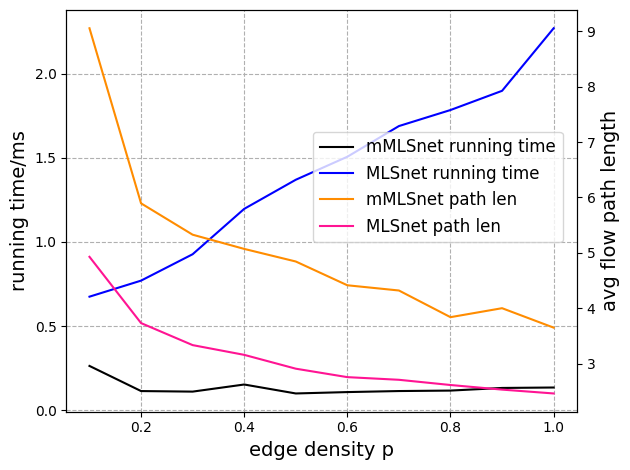

In [10]:
import networkx as nx
import random
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import files
import copy

def generate_random_weighted_graph(n_nodes, n_edges, p):
    G = nx.Graph()
    secret_num = math.floor(n_nodes*p)
    for i in range(secret_num):
        G.add_node(i, label=1)
    for i in range(secret_num, n_nodes):
        G.add_node(i, label=0)
    #initialization of the secret nodes
    for _ in range(n_edges):
        u, v = random.sample(list(G.nodes), k=2)
        if G.nodes[u]['label']!=G.nodes[v]['label']:
          G.add_edge(u, v, weight=1)
        else:
          G.add_edge(u, v, weight=0)
    #initialization of the weight
    #Todo: potential problem is duplicately adding edges
    return G

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph.nodes}
    distances[start] = 0
    queue = [(0, start)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    return distances

def fulldijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        # Early stopping condition
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            return path[::-1], distances

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None


def original(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    c = end
    path = []
    while c is not None:
        path.append(c)
        c = previous_nodes[c]
    return path[::-1], distances, previous_nodes

edgerate = np.arange(0.1, 1.1, 0.1)
searchtime1 = []
searchtime2 = []
sn1 = []
sn2 = []
l1 = []
l2 = []
repeatime = 50
for rate in edgerate:
    t1 = 0
    t2 = 0
    s1 = 0
    s2 = 0
    l1avg = []
    l2avg = []
    for _ in range(repeatime):
        ll1 = 0
        ll2 = 0
        p = 0.2 #percent of secret node
        nodenum = 50
        edgenum = math.floor(nodenum*(nodenum-1)*0.5*rate)
        graph = generate_random_weighted_graph(nodenum, edgenum, p)
        secretnum = math.floor(nodenum*p)
        #random graph connectivity check
        testans = dijkstra(graph, 0)
        #print(testans)
        cnt = 1
        for item in testans.keys():
            if(testans[item] == float('infinity')):
                cnt = 0
                #print("graph connectivity error")
                break
        if cnt==0:
            continue
        #flow initial
        # a potential determining param is the original secret flow numbers
        flows=[] #original secret flow
        paths=[]
        secretflownum = math.floor(secretnum*(secretnum-1)*0.3)
        for iter2 in range(secretflownum):
            u, v = random.sample(range(secretnum), k=2)
            #Todo: potential add depulicate flows
            flows.append([u,v])
            path, distances = fulldijkstra(graph,u,v)
            paths.append(path)
            if(distances[u] != 0):
                for step in path:
                    if(graph.nodes[step]['label']!=0):
                        graph.nodes[step]['label'] = 1
                        for neighbor in graph[step]:
                            if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                                graph[step][neighbor]['weight'] = 1
                            else:
                                graph[step][neighbor]['weight'] = 0

        m = random.choice(range(secretnum, nodenum)) #pick a random public node as the moving mobile node

        previous = random.choice(range(secretnum))
        focusflownum = 0
        focuslist = []
        for iter5 in range(secretflownum):
            if(flows[iter5][0] == previous or flows[iter5][1] == previous):
                ll1 = ll1 + len(paths[iter5])
                focusflownum = focusflownum + 1
                anotherfocus = flows[iter5][0] + flows[iter5][1] - previous
                focuslist.append(anotherfocus)
        graph.nodes[m]['label'] = 1
        for neighbor in graph[m]:
            graph[m][neighbor]['weight'] = 1 - graph.nodes[neighbor]['label']
        #find an incremental path
        start1 = time.time()
        path, distances = fulldijkstra(graph, m, previous)
        end1 = time.time()
        elapsed1 = end1 - start1
        #print(f'The program took {elapsed1} seconds to complete')
        start2 = time.time()
        res1, res2, res3 = original(graph, m, previous)
        end2 = time.time()
        elapsed2 = end2 - start2
        #print(f'The program took {elapsed2} seconds to complete')
        #print(2*elapsed2/elapsed1)
        #print(path, distances)
        t1 = t1 + elapsed1*100
        t2 = t2 + elapsed2*100
        graphc = copy.deepcopy(graph)
        for step in path:
            if(graph.nodes[step]['label']!=0):
                graph.nodes[step]['label'] = 1
                for neighbor in graph[step]:
                    if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                        graph[step][neighbor]['weight'] = 1
                    else:
                        graph[step][neighbor]['weight'] = 0
        ll1 = ll1 + (len(path)-1)*focusflownum
        rvpath = path[::-1]
        for focusnode in focuslist:
            if focusnode in rvpath:
                del_cnt = 2*rvpath.index(focusnode)
                ll1 = ll1 - del_cnt
        for iter3 in range(nodenum):
            s1 = s1 + graph.nodes[iter3]['label'] 
        for step in res1:
            if(graphc.nodes[step]['label']!=0):
                graphc.nodes[step]['label'] = 1
                for neighbor in graphc[step]:
                    if graphc.nodes[step]['label']!=graphc.nodes[neighbor]['label']:
                        graphc[step][neighbor]['weight'] = 1
                    else:
                        graphc[step][neighbor]['weight'] = 0
        for iter4 in range(nodenum):
            s2 = s2 + graphc.nodes[iter4]['label']

        #ll2 calculation
        for focusnode in focuslist:
            c = focusnode
            newpath = []
            while c is not None:
                newpath.append(c)
                c = res3[c]
            ll2 = ll2 + len(newpath)
        if focusflownum != 0:
            ll1 = ll1/focusflownum
            ll2 = ll2/len(focuslist)
            l1avg.append(ll1)
            l2avg.append(ll2)
        '''
        drawcolordict=[]
        for item in range(nodenum):
            if(graph.nodes[item]['label']==1):
                drawcolordict.append('red')
            else:
                drawcolordict.append('yellow')
        '''
    searchtime1.append(t1)
    searchtime2.append(t2)
    sn1.append(s1)
    sn2.append(s2)
    l1.append(np.average(l1avg))
    l2.append(np.average(l2avg))
print(edgerate)
print(searchtime1)
print(searchtime2)
time1 = np.array(searchtime1)
time2 = np.array(searchtime2)
secret_node_num1 = np.array(sn1)
secret_node_num2 = np.array(sn2)
avgpathlen1 = np.array(l1)
avgpathlen2 = np.array(l2)

fig, ax1 = plt.subplots()
line1, = ax1.plot(edgerate, 1000*0.01*time1/repeatime, label='mMLSnet running time',color='black')
line2, = ax1.plot(edgerate, 1000*0.02*time2/repeatime, label='MLSnet running time',color='blue')
ax1.set_ylabel('running time/ms', fontsize=14)  # set y-axis label
ax1.set_xlabel("edge density p", fontsize=14)
ax1.grid(linestyle='--')

ax2 = ax1.twinx()
line3, = ax2.plot(edgerate, avgpathlen1, label='mMLSnet path len', color='darkorange')
line4, = ax2.plot(edgerate, avgpathlen2, label='MLSnet path len', color='deeppink')
ax2.set_ylabel('avg flow path length', fontsize=14)  # set y-axis label
fig.legend(handles=[line1, line2, line3, line4], loc='center right', bbox_to_anchor=(0.4, 0.35, 0.5, 0.5), fontsize = 12)
fig.tight_layout()
plt.savefig("random_graph_p.eps")
files.download("random_graph_p.eps") 


[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
[4.733562469482422, 8.279037475585938, 5.525970458984375, 6.351280212402344, 6.886911392211914, 7.745671272277832, 9.623003005981445, 8.855986595153809, 10.153460502624512, 11.676907539367676, 12.865018844604492, 14.289712905883789, 15.766620635986328, 16.733789443969727, 19.35136318206787, 21.89643383026123, 21.1759090423584]
[8.08711051940918, 15.675711631774902, 13.924002647399902, 18.024539947509766, 23.425936698913574, 33.954787254333496, 43.61445903778076, 48.94094467163086, 63.478827476501465, 75.5333423614502, 87.59956359863281, 98.70598316192627, 123.70932102203369, 131.11519813537598, 155.67827224731445, 182.74433612823486, 192.23945140838623]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

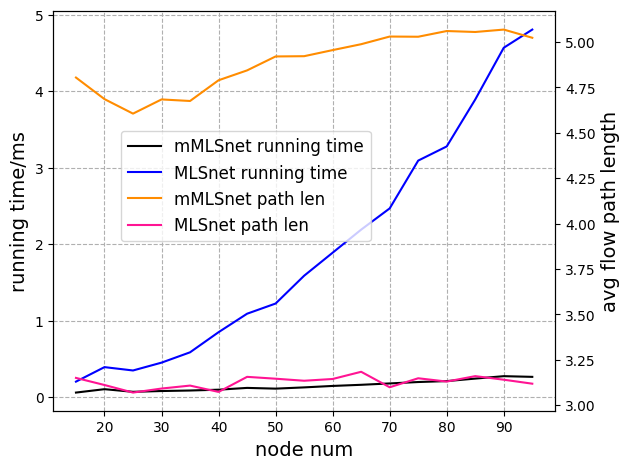

In [23]:
import networkx as nx
import random
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import files
import copy

def generate_random_weighted_graph(n_nodes, n_edges, p):
    G = nx.Graph()
    secret_num = math.floor(n_nodes*p)
    for i in range(secret_num):
        G.add_node(i, label=1)
    for i in range(secret_num, n_nodes):
        G.add_node(i, label=0)
    #initialization of the secret nodes
    for _ in range(n_edges):
        u, v = random.sample(list(G.nodes), k=2)
        if G.nodes[u]['label']!=G.nodes[v]['label']:
          G.add_edge(u, v, weight=1)
        else:
          G.add_edge(u, v, weight=0)
    #initialization of the weight
    #Todo: potential problem is duplicately adding edges
    return G

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph.nodes}
    distances[start] = 0
    queue = [(0, start)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    return distances

def fulldijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        # Early stopping condition
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            return path[::-1], distances

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    return None, None


def original(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor in graph[current_node]:
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    c = end
    path = []
    while c is not None:
        path.append(c)
        c = previous_nodes[c]
    return path[::-1], distances, previous_nodes

edgerate = np.arange(15, 100, 5)
searchtime1 = []
searchtime2 = []
sn1 = []
sn2 = []
l1 = []
l2 = []
repeatime = 800
for rate in edgerate:
    t1 = 0
    t2 = 0
    s1 = 0
    s2 = 0
    l1avg = []
    l2avg = []
    for _ in range(repeatime):
        ll1 = 0
        ll2 = 0
        p = 0.2 #percent of secret node
        nodenum = rate
        edgenum = math.floor(nodenum*(nodenum-1)*0.5*0.4)
        graph = generate_random_weighted_graph(nodenum, edgenum, p)
        secretnum = math.floor(nodenum*p)
        #random graph connectivity check
        testans = dijkstra(graph, 0)
        #print(testans)
        cnt = 1
        for item in testans.keys():
            if(testans[item] == float('infinity')):
                cnt = 0
                #print("graph connectivity error")
                break
        if cnt==0:
            continue
        #flow initial
        # a potential determining param is the original secret flow numbers
        flows=[] #original secret flow
        paths=[]
        secretflownum = math.floor(secretnum*(secretnum-1)*0.2)
        for iter2 in range(secretflownum):
            u, v = random.sample(range(secretnum), k=2)
            #Todo: potential add depulicate flows
            flows.append([u,v])
            path, distances = fulldijkstra(graph,u,v)
            paths.append(path)
            if(distances[u] != 0):
                for step in path:
                    if(graph.nodes[step]['label']!=0):
                        graph.nodes[step]['label'] = 1
                        for neighbor in graph[step]:
                            if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                                graph[step][neighbor]['weight'] = 1
                            else:
                                graph[step][neighbor]['weight'] = 0

        m = random.choice(range(secretnum, nodenum)) #pick a random public node as the moving mobile node

        previous = random.choice(range(secretnum))
        focusflownum = 0
        focuslist = []
        for iter5 in range(secretflownum):
            if(flows[iter5][0] == previous or flows[iter5][1] == previous):
                ll1 = ll1 + len(paths[iter5])
                focusflownum = focusflownum + 1
                anotherfocus = flows[iter5][0] + flows[iter5][1] - previous
                focuslist.append(anotherfocus)
        graph.nodes[m]['label'] = 1
        for neighbor in graph[m]:
            graph[m][neighbor]['weight'] = 1 - graph.nodes[neighbor]['label']
        #find an incremental path
        start1 = time.time()
        path, distances = fulldijkstra(graph, m, previous)
        end1 = time.time()
        elapsed1 = end1 - start1
        #print(f'The program took {elapsed1} seconds to complete')
        start2 = time.time()
        res1, res2, res3 = original(graph, m, previous)
        end2 = time.time()
        elapsed2 = end2 - start2
        #print(f'The program took {elapsed2} seconds to complete')
        #print(2*elapsed2/elapsed1)
        #print(path, distances)
        t1 = t1 + elapsed1*100
        t2 = t2 + elapsed2*100
        graphc = copy.deepcopy(graph)
        for step in path:
            if(graph.nodes[step]['label']!=0):
                graph.nodes[step]['label'] = 1
                for neighbor in graph[step]:
                    if graph.nodes[step]['label']!=graph.nodes[neighbor]['label']:
                        graph[step][neighbor]['weight'] = 1
                    else:
                        graph[step][neighbor]['weight'] = 0
        ll1 = ll1 + (len(path)-1)*focusflownum
        rvpath = path[::-1]
        for focusnode in focuslist:
            if focusnode in rvpath:
                del_cnt = 2*rvpath.index(focusnode)
                ll1 = ll1 - del_cnt
        for iter3 in range(nodenum):
            s1 = s1 + graph.nodes[iter3]['label'] 
        for step in res1:
            if(graphc.nodes[step]['label']!=0):
                graphc.nodes[step]['label'] = 1
                for neighbor in graphc[step]:
                    if graphc.nodes[step]['label']!=graphc.nodes[neighbor]['label']:
                        graphc[step][neighbor]['weight'] = 1
                    else:
                        graphc[step][neighbor]['weight'] = 0
        for iter4 in range(nodenum):
            s2 = s2 + graphc.nodes[iter4]['label']

        #ll2 calculation
        for focusnode in focuslist:
            c = focusnode
            newpath = []
            while c is not None:
                newpath.append(c)
                c = res3[c]
            ll2 = ll2 + len(newpath)
        if focusflownum != 0:
            ll1 = ll1/focusflownum
            ll2 = ll2/len(focuslist)
            l1avg.append(ll1)
            l2avg.append(ll2)
        '''
        drawcolordict=[]
        for item in range(nodenum):
            if(graph.nodes[item]['label']==1):
                drawcolordict.append('red')
            else:
                drawcolordict.append('yellow')
        '''
    searchtime1.append(t1)
    searchtime2.append(t2)
    sn1.append(s1)
    sn2.append(s2)
    l1.append(np.average(l1avg))
    l2.append(np.average(l2avg))
print(edgerate)
print(searchtime1)
print(searchtime2)
time1 = np.array(searchtime1)
time2 = np.array(searchtime2)
secret_node_num1 = np.array(sn1)
secret_node_num2 = np.array(sn2)
avgpathlen1 = np.array(l1)
avgpathlen2 = np.array(l2)

fig, ax1 = plt.subplots()
line1, = ax1.plot(edgerate, 1000*0.01*time1/repeatime, label='mMLSnet running time',color='black')
line2, = ax1.plot(edgerate, 1000*0.02*time2/repeatime, label='MLSnet running time',color='blue')
ax1.set_ylabel('running time/ms', fontsize=14)  # set y-axis label
ax1.set_xlabel("node num", fontsize=14)
ax1.grid(linestyle='--')

ax2 = ax1.twinx()
line3, = ax2.plot(edgerate, avgpathlen1, label='mMLSnet path len', color='darkorange')
line4, = ax2.plot(edgerate, avgpathlen2, label='MLSnet path len', color='deeppink')
ax2.set_ylabel('avg flow path length', fontsize=14)  # set y-axis label
fig.legend(handles=[line1, line2, line3, line4], loc='center right', bbox_to_anchor=(0.1, 0.35, 0.5, 0.5), fontsize = 12)
fig.tight_layout()
plt.savefig("random_graph_n.eps")
files.download("random_graph_n.eps") 